Here I'll work with Iris Dataset. I'll try some EDAs, followed by some basic ML models. Finally I'll try to fit a deep learning model and see which one works better.

In [1]:
from google.colab import files
files.upload()

Saving Iris.csv to Iris (2).csv


{'Iris.csv': b'Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species\n1,5.1,3.5,1.4,0.2,Iris-setosa\n2,4.9,3.0,1.4,0.2,Iris-setosa\n3,4.7,3.2,1.3,0.2,Iris-setosa\n4,4.6,3.1,1.5,0.2,Iris-setosa\n5,5.0,3.6,1.4,0.2,Iris-setosa\n6,5.4,3.9,1.7,0.4,Iris-setosa\n7,4.6,3.4,1.4,0.3,Iris-setosa\n8,5.0,3.4,1.5,0.2,Iris-setosa\n9,4.4,2.9,1.4,0.2,Iris-setosa\n10,4.9,3.1,1.5,0.1,Iris-setosa\n11,5.4,3.7,1.5,0.2,Iris-setosa\n12,4.8,3.4,1.6,0.2,Iris-setosa\n13,4.8,3.0,1.4,0.1,Iris-setosa\n14,4.3,3.0,1.1,0.1,Iris-setosa\n15,5.8,4.0,1.2,0.2,Iris-setosa\n16,5.7,4.4,1.5,0.4,Iris-setosa\n17,5.4,3.9,1.3,0.4,Iris-setosa\n18,5.1,3.5,1.4,0.3,Iris-setosa\n19,5.7,3.8,1.7,0.3,Iris-setosa\n20,5.1,3.8,1.5,0.3,Iris-setosa\n21,5.4,3.4,1.7,0.2,Iris-setosa\n22,5.1,3.7,1.5,0.4,Iris-setosa\n23,4.6,3.6,1.0,0.2,Iris-setosa\n24,5.1,3.3,1.7,0.5,Iris-setosa\n25,4.8,3.4,1.9,0.2,Iris-setosa\n26,5.0,3.0,1.6,0.2,Iris-setosa\n27,5.0,3.4,1.6,0.4,Iris-setosa\n28,5.2,3.5,1.5,0.2,Iris-setosa\n29,5.2,3.4,1.4,0.2,Iris-setosa\n

In [2]:
! pip install pandas plotnine

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Let's import the data and perform some cleaning.

In [4]:
iris = pd.read_csv('Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.drop("Id", axis=1, inplace = True)
iris['Species'] = iris['Species'].str.replace('Iris-', '')
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Some basic Exploratory Analyses.

In [6]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#Let's see if the data has skewness
np.unique(np.array(iris.Species), return_counts=True)

(array(['setosa', 'versicolor', 'virginica'], dtype=object),
 array([50, 50, 50]))

Let's check out some basic plots.

Couldn't resist myself from using the famous ggplot package from R!

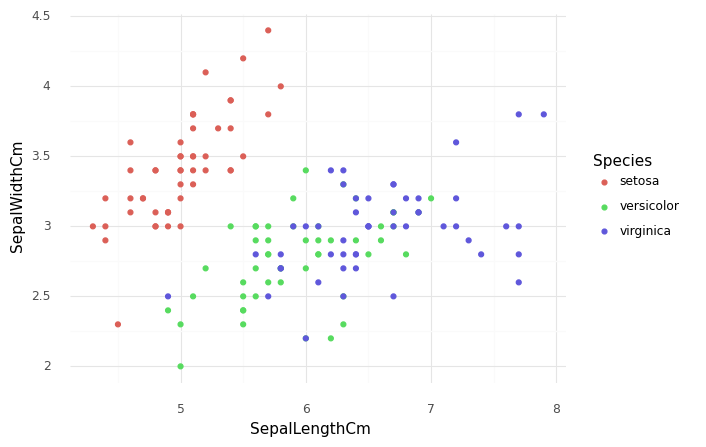

<ggplot: (-9223363304364829475)>

In [9]:
ggplot(iris, aes(x='SepalLengthCm', y='SepalWidthCm', colour = 'Species')) + geom_point() + theme_minimal()

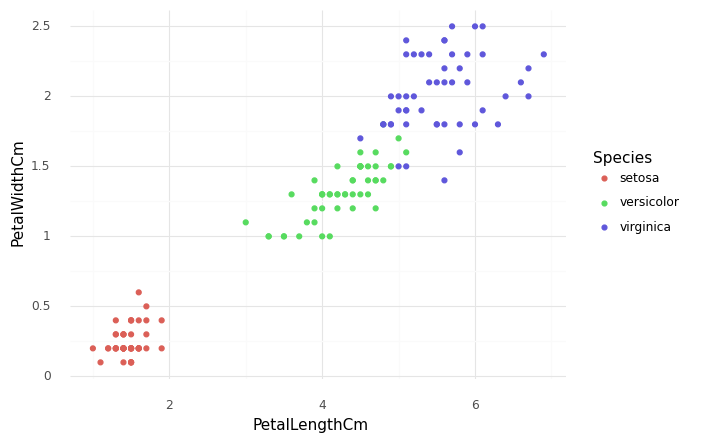

<ggplot: (8732488664552)>

In [10]:
ggplot(iris, aes(x='PetalLengthCm', y='PetalWidthCm', colour = 'Species')) + geom_point() + theme_minimal() 

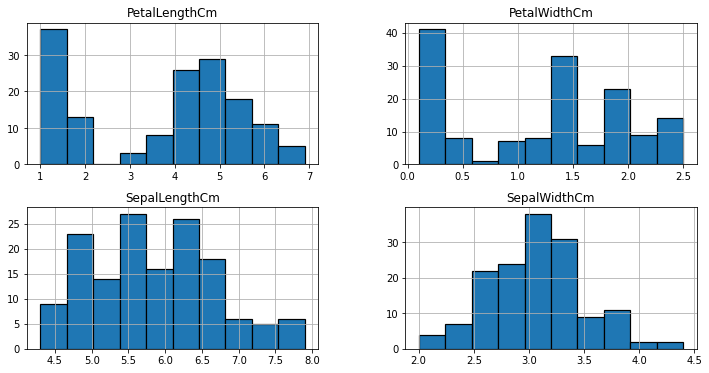

In [11]:
iris.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

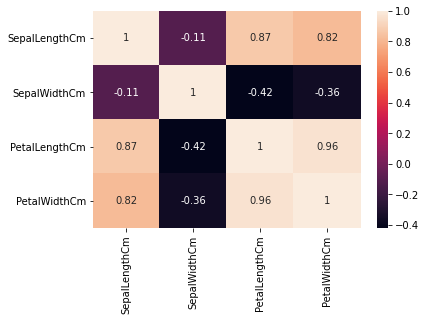

In [12]:
sns.heatmap(iris.corr(), annot=True)
plt.show()

Let's dig into some basic ML models!!

Here I've used Support Vector Machine, Decision Tree Classifier and K-Nearest Neighbor.

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [33]:
features = iris.drop('Species', axis=1)
response = iris.Species

scaler = StandardScaler()
features_norm = scaler.fit_transform(features)

label = LabelEncoder()
response_lab = np.array(label.fit_transform(response), ndmin = 1)

train_X, test_X, train_y, test_y = train_test_split(features_norm, response_lab, test_size=0.3)

In [34]:
print('train_X shape: ', train_X.shape)
print('train_y shape: ', train_y.shape)
print('test_X shape: ', test_X.shape)
print('test_y shape: ', test_y.shape)

train_X shape:  (105, 4)
train_y shape:  (105,)
test_X shape:  (45, 4)
test_y shape:  (45,)


**Support Vector Machine**

In [35]:
model = svm.SVC()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of the SVM is:  0.9555555555555556


**Decision Tree Classifier**

In [36]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of Decision Tree is:  0.9777777777777777


**K-Nearest Neighbor**

In [37]:
model = KNeighborsClassifier(n_neighbors=9) # this examines 3 neighbors for putting the data into class
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction, test_y))

The accuracy of KNN is:  0.9777777777777777


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


([<matplotlib.axis.XTick at 0x7f12c1db40b8>,
 <a list of 10 Text major ticklabel objects>)

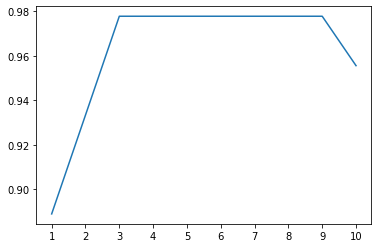

In [38]:
a_index = list(range(1,11))
a = pd.Series()
for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_y)))
plt.plot(a_index, a)
x = [1,2,3,4,5,6,7,8,9,10]
plt.xticks(x)

Finally, I'll try to fit a deep neural network model. I've used 2 hidden layers with Relu activation fuction and the output layer with Softmax Activation.

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.utils import to_categorical

In [40]:
train_y_hot = to_categorical(train_y)
test_y_hot = to_categorical(test_y)

In [41]:
model=Sequential()
model.add(Dense(1000,input_dim=4,activation='relu'))
model.add(Dense(500,activation='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 1000)              5000      
_________________________________________________________________
dense_9 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_10 (Dense)             (None, 300)               150300    
_________________________________________________________________
dropout_2 (Dropout)          (None, 300)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 903       
Total params: 656,703
Trainable params: 656,703
Non-trainable params: 0
_________________________________________________________________


In [43]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.9999):
      print("\nReached over 99.99% validation accuracy, so cancelling training!")
      self.model.stop_training = True

In [44]:
history = model.fit(train_X, train_y_hot , validation_data = (test_X, test_y_hot), epochs=100, verbose=1, callbacks=[myCallback()])
print("Training Complete")

Epoch 1/100
4/4 [==============================] - 0s 40ms/step - loss: 0.8537 - accuracy: 0.7905 - val_loss: 0.5407 - val_accuracy: 0.7778
Epoch 2/100
4/4 [==============================] - 0s 16ms/step - loss: 0.4293 - accuracy: 0.8286 - val_loss: 0.3869 - val_accuracy: 0.7778
Epoch 3/100
4/4 [==============================] - 0s 16ms/step - loss: 0.3103 - accuracy: 0.8571 - val_loss: 0.3134 - val_accuracy: 0.8000
Epoch 4/100
4/4 [==============================] - 0s 18ms/step - loss: 0.2401 - accuracy: 0.8667 - val_loss: 0.2861 - val_accuracy: 0.9333
Epoch 5/100
4/4 [==============================] - 0s 17ms/step - loss: 0.2370 - accuracy: 0.9143 - val_loss: 0.2733 - val_accuracy: 0.8444
Epoch 6/100
4/4 [==============================] - 0s 17ms/step - loss: 0.2055 - accuracy: 0.8952 - val_loss: 0.2808 - val_accuracy: 0.8444
Epoch 7/100
4/4 [==============================] - 0s 17ms/step - loss: 0.1887 - accuracy: 0.8952 - val_loss: 0.2913 - val_accuracy: 0.8667
Epoch 8/100
4/4 [===

<Figure size 432x288 with 0 Axes>

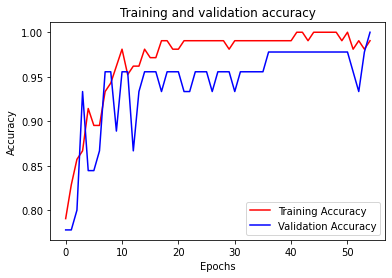

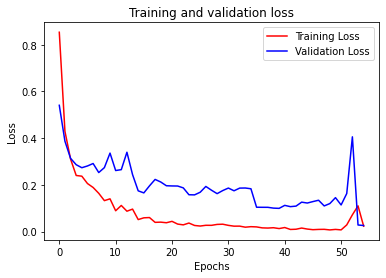

<Figure size 432x288 with 0 Axes>

In [45]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))

plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training Accuracy", "Validation Accuracy"])

plt.figure()

plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training Loss", "Validation Loss"])

plt.figure()

As we can see, the deep neural network model is outperforming all the other models, attaining an accuracy of 100%!!